# Jupyter viewer example
This notebook is an example of using the occwl JupyterViewer to view solids and select faces and edges.

In [ ]:
# Automatically reload libraries when the code changes
%load_ext autoreload
%autoreload 2

# Depending on how you have occwl installed you may need to switch into the src directory for jupyter to see the code
import os
os.chdir("../src")

# Imports from occwl
from occwl.compound import Compound
from occwl.entity_mapper import EntityMapper
from occwl.uvgrid import uvgrid
from occwl.jupyter_viewer import JupyterViewer

os.chdir("../")

import numpy as np


: 

We start by loading a step file.

In [ ]:
solids = list(Compound.load_from_step("examples/example.stp").solids())
print(f"Loaded {len(solids)} solids")
solid = solids[0]

: 

In [ ]:
import pathlib
compound = Compound.load_from_step("/local-scratch/localhome/xya120/studio/datasets/fatemp/19518_f220b68a/assembly.step")
solid = compound

: 

We can now create the JupyterViewer and display the solid.  This is a minimal example.

In [6]:
viewer = JupyterViewer()
viewer.display(solid)
viewer.show()

: 

## Adding color to faces and edges
Here is an example using a few more advanced options.  Control over the color of faces and edges.

In [4]:
viewer2 = JupyterViewer()
viewer2.display(solid, shape_color="green", edge_color="black", render_edges=True)
viewer2.show()

! value [-1.0267812228188097e-05, -1.4528618285325479e-05, -15.589901123939594]
! value [0.9530586434349033, -0.3027857694373561, -1.513996140092962e-07, 4.765505030583045e-07]
! value 2.036265625
! value (-1.0267812228188097e-05, -1.4528618285325479e-05, -15.589901123939594)
! value (0.9530586434349033, -0.3027857694373561, -1.513996140092962e-07, 4.765505030583045e-07)
! value 2.036265625
! value [-1.0267812227823665e-05, -1.4528618285325479e-05, -15.589901123939594]
! value [0.9530586434374358, -0.3027857694293845, -1.5139961400352032e-07, 4.765505030539369e-07]
! value 2.1434375
! value (-1.0267812227823665e-05, -1.4528618285325479e-05, -15.589901123939594)
! value (0.9530586434374358, -0.3027857694293845, -1.5139961400352032e-07, 4.765505030539369e-07)
! value 2.1434375
! value [-1.0267812227580624e-05, -1.4528618285325479e-05, -15.589901123939594]
! value [0.9530586434391248, -0.3027857694240682, -1.5139961399966836e-07, 4.765505030510241e-07]
! value 2.25625
! value (-1.02678122

## Selecting individual faces and edges
To allow individual faces and edges to be selected you need to display them individually as shown below.

In [5]:
viewer3 = JupyterViewer()
for face in solid.faces():
    viewer3.display(face, render_edges=True)
viewer3.show()

TraitError: The 'rotation' trait of a GridHelper instance contains an Enum of an Euler which expected any of ['XYZ', 'YZX', 'ZXY', 'XZY', 'YXZ', 'ZYX'], not the str 'xyz'.

Double click on the faces to select them, then rerun the cell below

In [6]:
if len(viewer3.selected_faces()) <= 0:
    print("Please select some faces to view this demo")
else:
    entity_mapper = EntityMapper(solid)
    selected_face_indices = viewer3.selected_face_indices(entity_mapper)
    print(f"The faces you selected were {selected_face_indices}")

Please select some faces to view this demo


## Viewing faces colored by some scalar function
Here we show how to color the faces based on their area

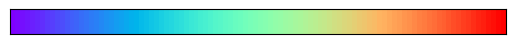

In [ ]:
face_areas = []
import numpy as np
for face in solid.faces():
    #face_areas.append(face.area())
    face_areas.append( np.random.rand() )
    
face_areas = np.array(face_areas)
viewer4 = JupyterViewer()
viewer4.display_face_colormap(solid, face_areas)
viewer4.show()

## Visualizing point grids
This example shows how point grids can be visualized

In [ ]:
viewer5 = JupyterViewer()
for face in solid.faces():
    viewer5.display(face, render_edges=True)
viewer5.show()

In [ ]:
if len(viewer5.selected_faces()) <= 0:
    print("Please select some faces to view this demo")
else:
    for face in viewer5.selected_faces():
        num_u = 5
        num_v = 5
        points = np.reshape(uvgrid(face, num_u, num_v, method="point"),(-1, 3))
        viewer5.display_points(points)
        normals = uvgrid(face, num_u, num_v, method="normal").reshape((-1, 3))
        viewer5.display_unit_vectors(points, normals)